# Importing Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from matplotlib.ticker import MaxNLocator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Import SHATTER Bening Datasets

In [40]:
shatter_house_A = pd.read_csv("../../data/shatter/SHATTER-Dataframe_House-A.csv")
shatter_house_B = pd.read_csv("../../data/shatter/SHATTER-Dataframe_House-B.csv")

# Day-wise SHATTER Benign Cost House-A

In [41]:
day_wise_shatter_cost_house_A = []
for i in range(0, 43200, 1440):
    day_wise_shatter_cost_house_A.append(sum(shatter_house_A["Control Cost ($)"][i:i+1400]))
total_shatter_benign_cost_house_A = sum(day_wise_shatter_cost_house_A)
total_shatter_benign_cost_house_A

55.346929529773575

# Day-wise SHATTER Benign Cost House-B

In [42]:
day_wise_shatter_cost_house_B = []
for i in range(0, 43200, 1440):
    day_wise_shatter_cost_house_B.append(sum(shatter_house_B["Control Cost ($)"][i:i+1400]))
total_shatter_benign_cost_house_B = sum(day_wise_shatter_cost_house_B)
total_shatter_benign_cost_house_B

25.81973450163854

# Reading SHATTER Attack-Schedule Datasets

In [14]:
house_A_occ_1_final_schedule = pd.read_csv("../../data/shatter/House-A_Occ-1_SHATTER_Schedule.csv").values
house_A_occ_2_final_schedule = pd.read_csv("../../data/shatter/House-A_Occ-2_SHATTER_Schedule.csv").values
house_B_occ_1_final_schedule = pd.read_csv("../../data/shatter/House-B_Occ-1_SHATTER_Schedule.csv").values
house_B_occ_2_final_schedule = pd.read_csv("../../data/shatter/House-B_Occ-2_SHATTER_Schedule.csv").values
house_A_occ_1_greedy_schedule =  pd.read_csv("../../data/shatter/House-A_Occ-1_Greedy_Schedule.csv").values
house_A_occ_2_greedy_schedule =  pd.read_csv("../../data/shatter/House-A_Occ-2_Greedy_Schedule.csv").values
house_B_occ_1_greedy_schedule =  pd.read_csv("../../data/shatter/House-B_Occ-1_Greedy_Schedule.csv").values
house_B_occ_2_greedy_schedule =  pd.read_csv("../../data/shatter/House-B_Occ-2_Greedy_Schedule.csv").values

# SHATTER Attack Cost Calculation for House-A and House-B (From Attack-Comparison-with-Appliances_House-A.ipynb notebook)

In [16]:
shatter_house_A_attack = 7.736
shatter_house_B_attack = 6.534

# Importing Datasets

In [17]:
app_cost_house_A = pd.read_csv("../../data/shatter/SHATTER-Attack_House-A_Appl-Cost.csv", header = None). values
app_cost_house_B = pd.read_csv("../../data/shatter/SHATTER-Attack_House-B_Appl-Cost.csv", header = None). values

app_cost_house_B + shatter_house_B_attack

array([[7.37086042],
       [8.33937787],
       [6.81603095],
       [8.06909592],
       [6.96407404],
       [7.08039672],
       [8.13709799],
       [7.0990871 ],
       [7.03344999],
       [7.13640724],
       [7.25299332],
       [6.67891634],
       [6.63442932],
       [7.88551589],
       [7.57152197],
       [7.39162583],
       [8.74399448],
       [7.57565497],
       [6.86383612],
       [7.71257251],
       [7.63041668],
       [8.07363444],
       [7.00235873],
       [8.46806543],
       [6.59277911],
       [7.69882429],
       [7.16807079],
       [7.60284064],
       [7.86048295],
       [7.77451058]])

# Plotting Function

In [67]:
def plotting(benign, base_data, cost_data, location, ylim_range):
    legendlist=['Benign Control Cost', 'Without Appliance Triggering Attack','With Appliance Triggering Attack' ]
    markers=['v','o','s']
    fig= plt.figure(figsize=(8,6.5))
    plt.plot(benign, marker=markers[0], linewidth=3, markersize=12)
    plt.plot(base_data, marker=markers[1], linewidth=3, markersize=12)
    plt.plot(cost_data, marker=markers[2], linewidth=3, markersize=12)
    plt.legend(legendlist,loc='center',fontsize="20")
    plt.yticks(fontsize="20")
    plt.xticks(fontsize="20")
    plt.ylim(ylim_range)
    plt.xlabel("Day of the Month",fontsize="24")
    plt.ylabel("Control Cost ($)",fontsize="24")
    plt.savefig(location + '.pdf', bbox_inches='tight')

# House-A Appl Cost Attack

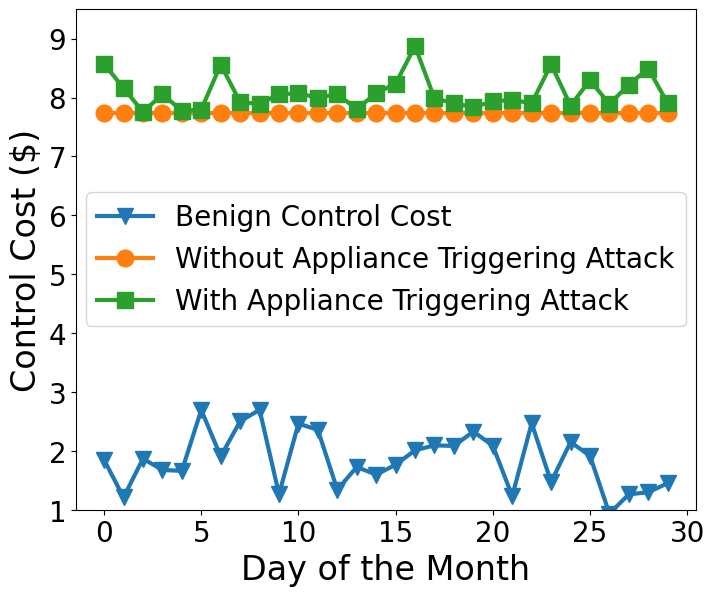

In [68]:
location = "../../plots/House-A_Appl_Cost"
ylim_range = [1, 9.5]
plotting(day_wise_shatter_cost_house_A, [shatter_house_A_attack] * 30, app_cost_house_A + shatter_house_A_attack, location, ylim_range)

# House-A Total Attack Cost

In [56]:
sum(app_cost_house_A + shatter_house_A_attack)

array([242.41014907])

# House-B Appl Cost Attack

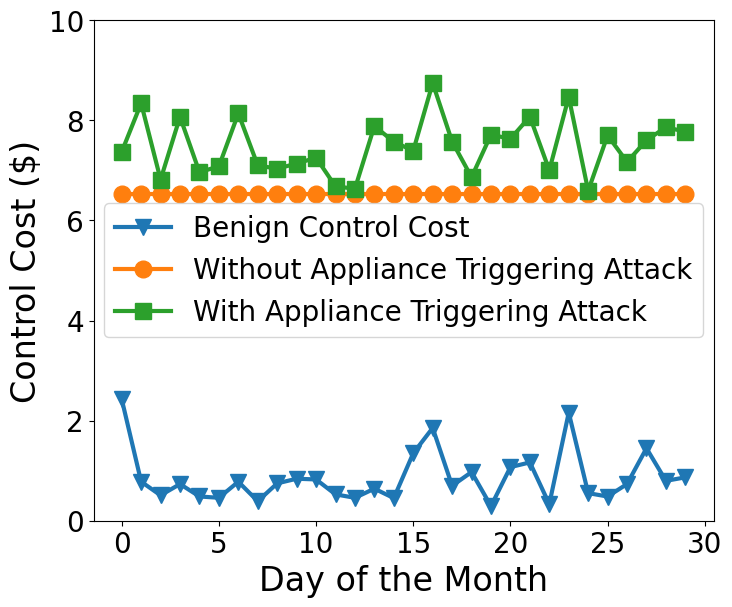

In [69]:
location = "../../plots/House-B_Appl_Cost"
ylim_range = [0, 10]
plotting(day_wise_shatter_cost_house_B, [shatter_house_B_attack] * 30, app_cost_house_B + shatter_house_B_attack, location, ylim_range)